In [73]:
import pandas as pd
import numpy as np

In [74]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [75]:
!wget $data

--2025-10-07 20:24:40--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.5’

data.csv.5          100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-10-07 20:24:40 (140 MB/s) - ‘data.csv.5’ saved [1475504/1475504]



In [76]:
df = pd.read_csv('data.csv')

In [77]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [78]:
# we make the column headings uniform
df.columns
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


After cleaning the Heading, we clean the values

In [79]:
# We have to separate string operations from numeric operations (object and int/float)
# we first have to determine the type

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [80]:
# to select only objects
df.dtypes == 'object'
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [81]:
# we extract the index (heading) and convert to list to make it iterable
# The index - make, model, engine_fuel_type, etc
# The values - object, int, float
df.dtypes[df.dtypes == 'object'].index
# df.dtypes[df.dtypes == 'object'].values
strings = df.dtypes[df.dtypes == 'object'].index.to_list()
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [82]:
for col in strings:
    print(col)

make
model
engine_fuel_type
transmission_type
driven_wheels
market_category
vehicle_size
vehicle_style


In [83]:
# we loop through the columns so we can manipulate the string values
# we convert to lower cases and replace the blank spaces with underscores
for col in strings:
    df[col] = df[col].str.replace(' ', '_').str.lower()

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Exploratory Data Analysis (EDA)

In [84]:
# We try to understand what type of data we have
df.columns
for col in df.columns:
 print (df[col].dtypes)

object
object
int64
object
float64
float64
object
object
float64
object
object
object
int64
int64
int64
int64


In [85]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())    
    # print(df[col].head(n=2))
    print("#############")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
#############
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
#############
year
[2011 2012 2013 1992 1993]
28
#############
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
#############
engine_hp
[335. 300. 230. 320. 172.]
356
#############
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
#############
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
#############
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
#############
number_of_doors
[ 2.  4.  3. nan]
3
#############
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
#############
vehicle_size
['compact' 'midsize' 'large']
3
#############
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']

In [86]:
df.msrp

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11914, dtype: int64

We visualise data using matplotlib and seaborn

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

#to make sure all plots are displayed in notebook
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

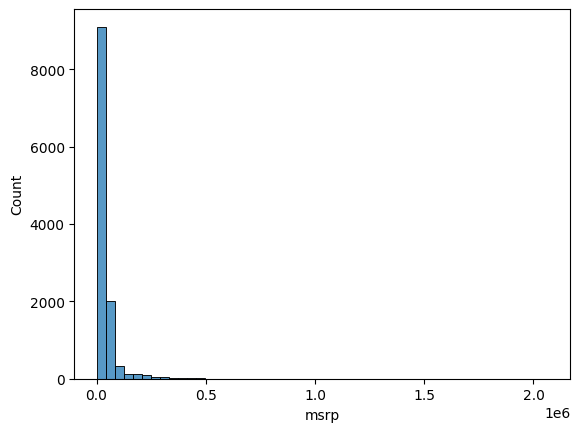

In [88]:
# we check the distribution of prices. to see how many prices we have
# we plot a histogram - bins represent how many bars we will show
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

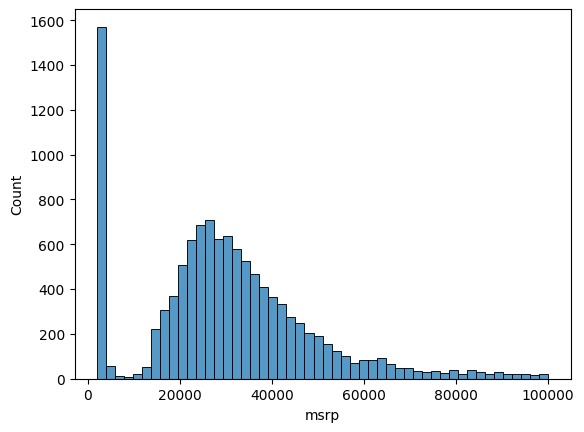

In [89]:
# Looking at prices less than 100,000
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

# This is a tail distribution, and this kind of data will affect the ML

In [90]:
# we apply logarithmic distribution to get rid of the long tail
np.log([1, 10, 1000, 10000])

# To avoid situations where we might have a zero price, we add 1
np.log([0+1, 1+1, 10+1, 1000+1, 10000+1])

# we use a function for this
np.log1p([0,1,10,100,1000,10000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [91]:
# we apply to our price
log_price = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

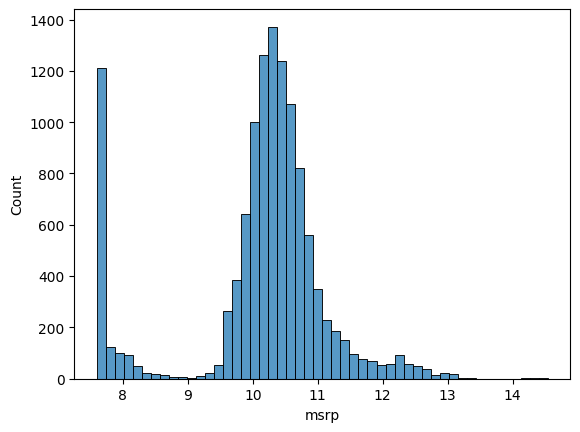

In [92]:
sns.histplot(log_price, bins=50)

# This gives us a normal distribution and gets rid of the tail

We check for missing values (Nan)

In [93]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

SETTING UP VALIDATION FRAMEWORK

In [94]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [95]:
n, n_val, n_test, n_train

# n_val + n_test + n_train

(11914, 2382, 2382, 7150)

In [96]:
df.iloc[[1,2,3]]
df.iloc[:4]
df.iloc[4:9]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900


In [97]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [98]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [99]:
# The problem with this is that the data is not evenly distributed betweem train, validate, and test
# we have to shuffle the records

In [100]:
# we take a range of n and shuffle it
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [101]:
idx     # This shows the shuffled dataset
idx[n_train:]       # This will show the shuffled trained data

array([2779, 3708, 4794, ..., 6637, 2575, 7336], shape=(4764,))

In [102]:
# We can now have a train, validate, and test dataset all shuffled

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [103]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [104]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [105]:
# We then reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [106]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [107]:
# We have spilt the data into three (train, val, test)
# Since we want to predict the price (msrp), we transform the price using logarithmic function and then drop it from the table

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [108]:
# We drop the target from the feature
# recall: g(X) = y. y=result, g=model, and X=matrix feature

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [109]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

LINEAR REGRESSION

In [110]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [111]:
# We use hp, city_mpg, and popularity to try to perform a linear regression
xi = [453, 11, 86]

In [112]:
# w0 = 0
# w = [1,1,1]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [113]:
# we write a function to predict the price using the hp, mpg, and popularity
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred

In [114]:
linear_regression(xi)

12.312

In [115]:
# Our answer will be in log. we need to take exponent
# np.log1p (which is plus 1) to np.expm1(minus 1)
np.expm1(12.312)

np.float64(222347.2221101062)

LINEAR REGRESSION - VECTOR FORM 

In [116]:
# we implement dot product formula/function here
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + w[j]*xi[j]
    return res

In [117]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [118]:
linear_regression(xi)

12.312000000000001

In [119]:
# We represent w_new as a combination of all w (weight) which is a vector
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [120]:
[1] + xi

[1, 453, 11, 86]

In [121]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [122]:
linear_regression(xi)

12.312

In [123]:
# we implement for a wide range of values
# This becomes MATRIX-VECTOR multiplication

In [124]:
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w

In [125]:
x1 = [1, 148, 24, 1348]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X
np.array(X)
X = np.array(X)

In [126]:
# The matrix-vector multiplication becomes
def linear_regression(X):
    return X. dot(w_new)

In [127]:
linear_regression(X)

array([12.306, 13.552, 12.312])

TRAINING A LINEAR REGRESSION MODEL

In [128]:
# To solve for the model from gX = y, we find the GRAM matrix of X. The GRAM matrix is a product of X and X.T
# we also solve for the inverse of the GRAM matrix. Thereafter, we multiply the inverse of the GRAM matrix to the GRAM matrix itself
# This is done for both sides of the equation. The GRAM matrix multiplied with its INVERSE will give an Identity matrix (1)
# The solution becomes g = ((X.T * X)^-1) * X.T * y

In [129]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [130]:
# GRAM MATRIX
XTX = X.T.dot(X)
XTX

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [131]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [132]:
# the dot product of GRAM and INVERSE matrix gives identity matrix
XTX.dot(XTX_inv).round()

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [133]:
y = [100000, 200000, 150000, 250000, 100000, 200000, 150000, 250000, 120000]

In [134]:
# we solve for g: using g = ((X.T * X)^-1) * X.T * y
w = XTX_inv.dot(X.T).dot(y)
w

array([ 261.90561506, 3061.01252164,   36.9690859 ])

In [135]:
# but we need to consider our bias term: w = [w0 w1 w2 w3 wn]. we should have 1 as first column for all rows of matrix X
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [136]:
# we append this to the matrix
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [137]:
XTX = X.T.dot(X)


In [138]:
XTX_inv = np.linalg.inv(XTX)

In [139]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+05, -2.27742529e+02, -2.57694130e+03, -2.30120640e+01])

In [140]:
w0 = w_full[0]
w = w_full[1:]

In [141]:
w0, w

(np.float64(300067.76692555624),
 array([ -227.74252872, -2576.94129594,   -23.01206399]))

In [142]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [143]:
# Putting it all as a function
def train_model(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [144]:
# This works with the X matrix without appending ones
train_model(X, y)

(np.float64(300067.76692555624),
 array([ -227.74252872, -2576.94129594,   -23.01206399]))

CAR PRICE BASELINE MODEL

In [145]:
# We will build a model using engine_hp, engine_cylinders, highway_mpg, city_mpg, and popularity
df_train
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [146]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]      # This gives a subset of the train dataset using the base columns

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [147]:
# we extract the values of the subset
df_train[base].values
X_train = df_train[base].values

In [148]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [149]:
# We have our matrix and the expected result
# Next thing to do is to train a model
train_model(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [150]:
# We have missing values, we have to fill them with zero (0)
df_train[base].isnull().sum()
df_train[base].fillna(0).values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [151]:
X_train = df_train[base].fillna(0).values

In [152]:
train_model(X_train, y_train)
# The result is proof that there are no Nan values

(np.float64(7.927257388070037),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [153]:
w0, w = train_model(X_train, y_train)
w0, w

(np.float64(7.927257388070037),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [154]:
# After training the model (w0, w), we use it to validate our prices
# we test our model against the train matrix to get a predicted price, we then compare the predicted price with actual/target price
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

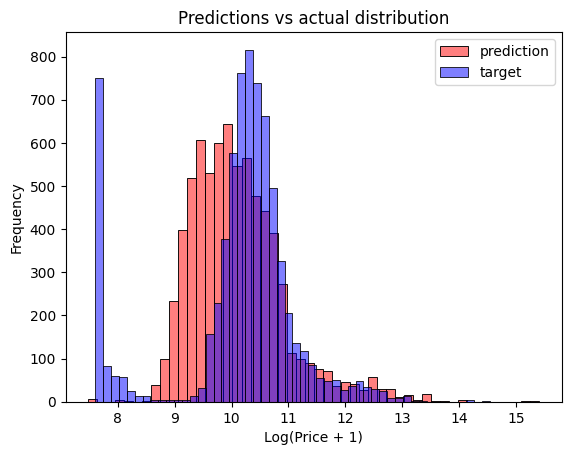

In [155]:
# We plot predicted price against target price
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=50)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

ROOT MEAN SQUARE ERROR

In [156]:
# Evaluating our linear regression models
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [157]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

COMPUTING RMSE ON VALIDATION DATA

In [158]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_val = df_val[base].fillna(0).values

y_pred = w0 + X_val.dot(w)

y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147], shape=(2382,))

In [159]:
rmse(y_val, y_pred)

np.float64(0.7616530991301627)

In [160]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [161]:
X_train = prepare_X(df_train)
w0, w = train_model(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301627)

SIMPLE FEATURE ENGINEERING

In [163]:
# Adding more features to our model
# We also consider the age of a vehicle
def prepare_X(df):
    df = df.copy()      # we take a copy of the data so we can modify it separately
    features = base.copy()

    df['age'] = 2017 - df.year  # since the latest car was made 2017, we use it as a base for evaluating other vehicles
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [165]:
X_train = prepare_X(df_train)
w0, w = train_model(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)
# the RMSE improves because we are using more data/feature to predict price

np.float64(0.5172055461058327)

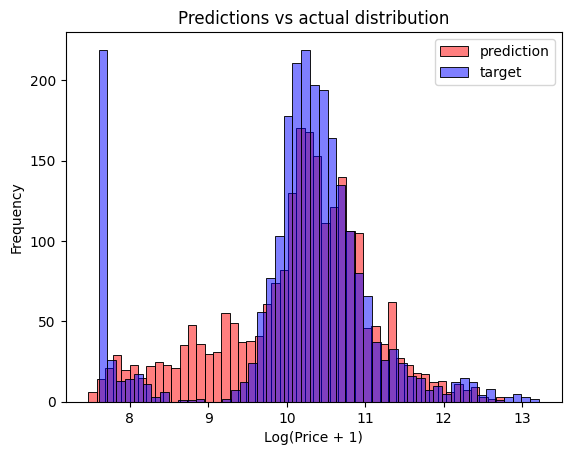

In [170]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=50)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()